#   Question 2 

#    Neural Network Forestfire Dataset 

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [2]:
forest_fires = pd.read_csv("forestfires.csv")
forest_fires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


###   Preprocessing the dataset

In [3]:
forest_fires[forest_fires.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
forest_fire = forest_fires.drop_duplicates().reset_index(drop=True)
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
forest_fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [7]:
label_encoder = LabelEncoder()
forest_fire["size_category"] = label_encoder.fit_transform(forest_fire["size_category"])

In [8]:
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


###  Visualizing the dataset 

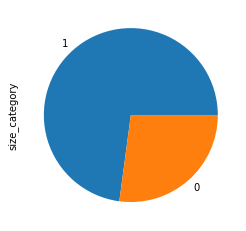

1    371
0    138
Name: size_category, dtype: int64


In [9]:
forest_fire['size_category'].value_counts().plot.pie()
plt.show()
print(forest_fire['size_category'].value_counts())

In [10]:
x = forest_fire.iloc[:,2:30]
y = forest_fire.iloc[:,-1]

###   Splitting the dataset

In [11]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((356, 28), (153, 28), (356,), (153,))

###   Standardizing the dataset

In [13]:
x_train= StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

###  This is a classification problem because y is a categorical variable  

###   Building the model 

In [14]:
model = Sequential()
model.add(Dense(20, input_dim=28, kernel_initializer='uniform', activation='relu',input_shape=(28,)))
model.add(Dense(15, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                580       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16,validation_split=0.3)

Epoch 1/100
16/16 [==============================] - 1s 60ms/step - loss: 0.6912 - accuracy: 0.6948 - val_loss: 0.6896 - val_accuracy: 0.6822
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 0.6860 - accuracy: 0.7309 - val_loss: 0.6845 - val_accuracy: 0.6822
Epoch 3/100
16/16 [==============================] - 0s 10ms/step - loss: 0.6777 - accuracy: 0.7309 - val_loss: 0.6771 - val_accuracy: 0.6822
Epoch 4/100
16/16 [==============================] - 0s 12ms/step - loss: 0.6632 - accuracy: 0.7309 - val_loss: 0.6643 - val_accuracy: 0.6822
Epoch 5/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6378 - accuracy: 0.7550 - val_loss: 0.6455 - val_accuracy: 0.6916
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.6000 - accuracy: 0.7711 - val_loss: 0.6233 - val_accuracy: 0.7009
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5496 - accuracy: 0.7831 - val_loss: 0.6042 - val_accuracy: 0.7103
Epoch 

16/16 [==============================] - 0s 6ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.8958 - val_accuracy: 0.8598
Epoch 59/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.8990 - val_accuracy: 0.8598
Epoch 60/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.9049 - val_accuracy: 0.8598
Epoch 61/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.9245 - val_accuracy: 0.8598
Epoch 62/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 0.9298 - val_accuracy: 0.8598
Epoch 63/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.9402 - val_accuracy: 0.8598
Epoch 64/100
16/16 [==============================] - 0s 9ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.9471 - val_accuracy: 0.8505
Epoch 65/100
16/16 

In [18]:
scores_train = model.evaluate(x_train, y_train)
print("loss:", scores_train[0])
print("accuracy:", scores_train[1]*100)

12/12 [==============================] - 0s 3ms/step - loss: 0.3775 - accuracy: 0.9551
loss: 0.3774597644805908
accuracy: 95.50561904907227


In [19]:
scores_test = model.evaluate(x_test, y_test)
print("loss:", scores_test[0])
print("accuracy:", scores_test[1]*100)

5/5 [==============================] - 0s 2ms/step - loss: 0.7652 - accuracy: 0.8301
loss: 0.7652127742767334
accuracy: 83.0065369606018


###  Visualization of training and testing 

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

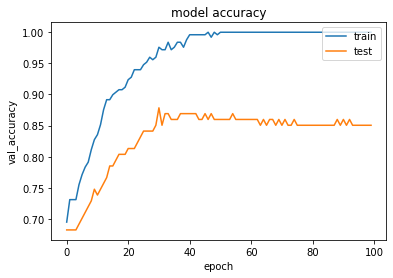

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

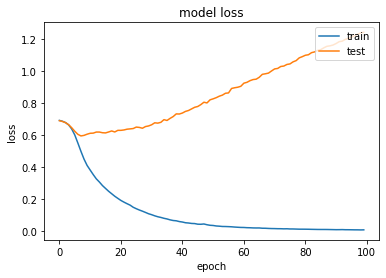

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

##   Tuning Hyperparameter

In [23]:
data = StandardScaler().fit_transform(x)
data

array([[-7.96039810e-01, -1.31838569e+00, -1.82893094e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-3.25665522e-03, -1.17405250e+00,  4.89256926e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [-3.25665522e-03, -1.04383887e+00,  5.61044929e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [-1.62485856e+00, -8.39889805e-01,  4.75141308e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 6.81419706e-01,  5.61083388e-01,  2.69859884e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-2.00323234e+00, -1.68235633e+00, -1.77892132e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

In [24]:
pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,...,509.000000,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02
mean,-1.120256e-15,-1.395958e-16,6.979791e-17,-1.343610e-16,2.303331e-16,1.465756e-16,1.395958e-16,-1.395958e-17,-1.744948e-17,-4.711359e-17,...,0.000000,1.744948e-17,-1.221463e-17,2.791916e-17,1.395958e-17,-9.771708e-17,-1.046969e-17,6.979791e-18,-9.771708e-17,6.281812e-17
std,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,...,1.000984,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00
min,-1.295805e+01,-1.712164e+00,-2.177385e+00,-1.969965e+00,-2.855946e+00,-1.789299e+00,-2.007272e+00,-6.903477e-02,-2.027913e-01,-4.414019e-01,...,-0.134164,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
25%,-7.532785e-02,-7.520348e-01,-4.439871e-01,-5.727610e-01,-5.938679e-01,-7.494866e-01,-7.288945e-01,-6.903477e-02,-2.027913e-01,-4.414019e-01,...,-0.134164,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
50%,1.769213e-01,-3.036890e-02,4.694951e-01,-1.361347e-01,7.447337e-02,-1.378325e-01,-6.333465e-03,-6.903477e-02,-1.932706e-01,-4.414019e-01,...,-0.134164,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
75%,4.111527e-01,4.873480e-01,6.699368e-01,4.314794e-01,6.742668e-01,5.349871e-01,4.939011e-01,-6.903477e-02,-1.000917e-01,-4.414019e-01,...,-0.134164,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,1.399751e+00
max,1.005740e+00,2.840606e+00,1.261583e+00,1.027740e+01,2.473647e+00,3.409762e+00,2.995074e+00,2.155478e+01,1.682288e+01,2.265509e+00,...,7.453560,4.944694e+00,1.592168e+01,3.860861e+00,5.550901e+00,2.933219e+00,1.592168e+01,2.253886e+01,5.738757e+00,1.399751e+00


###   1) Optimization Algorithm

In [25]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

###   Build the model

In [26]:
def create_model(optimizer = 'adam'):
    model = Sequential()
    model.add(Dense(20, input_dim=28, kernel_initializer='uniform', activation='relu',input_shape=(28,)))
    model.add(Dense(15, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'],)
    return model

In [27]:
model = KerasClassifier(build_fn = create_model,verbose = 0,epochs=100, batch_size=16)

###  Define the grid search parameters

In [28]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(data,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START optimizer=SGD...............................................
[CV 1/5; 1/7] END .............................optimizer=SGD; total time=   8.3s
[CV 2/5; 1/7] START optimizer=SGD...............................................
[CV 2/5; 1/7] END .............................optimizer=SGD; total time=   7.3s
[CV 3/5; 1/7] START optimizer=SGD...............................................
[CV 3/5; 1/7] END .............................optimizer=SGD; total time=   9.0s
[CV 4/5; 1/7] START optimizer=SGD...............................................
[CV 4/5; 1/7] END .............................optimizer=SGD; total time=   9.9s
[CV 5/5; 1/7] START optimizer=SGD...............................................
[CV 5/5; 1/7] END .............................optimizer=SGD; total time=   9.1s
[CV 1/5; 2/7] START optimizer=RMSprop...........................................
[CV 1/5; 2/7] END .........................optimi

###   Summarize results

In [29]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.925334882736206, using {'optimizer': 'RMSprop'}
0.728809940814972,0.1592563941055272 with: {'optimizer': 'SGD'}
0.925334882736206,0.044121661016460596 with: {'optimizer': 'RMSprop'}
0.728809940814972,0.1592563941055272 with: {'optimizer': 'Adagrad'}
0.728809940814972,0.1592563941055272 with: {'optimizer': 'Adadelta'}
0.921374499797821,0.041224029822166865 with: {'optimizer': 'Adam'}
0.872316038608551,0.07201362007486495 with: {'optimizer': 'Adamax'}
0.9095709443092346,0.050273509568525374 with: {'optimizer': 'Nadam'}


###   2) Batch Size and Epochs

In [30]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam 

###   Build the model

In [31]:
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=30, kernel_initializer='uniform', activation='relu',input_shape=(28,)))
    model.add(Dense(15, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
model = KerasClassifier(build_fn = create_model,verbose = 0)

###   Define the grid search parameters

In [33]:
batch_size = [8,16,32,64,128]
epochs = [20,50,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(data,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START batch_size=8, epochs=20....................................
[CV 1/5; 1/15] END ..................batch_size=8, epochs=20; total time=   6.0s
[CV 2/5; 1/15] START batch_size=8, epochs=20....................................
[CV 2/5; 1/15] END ..................batch_size=8, epochs=20; total time=   5.6s
[CV 3/5; 1/15] START batch_size=8, epochs=20....................................
[CV 3/5; 1/15] END ..................batch_size=8, epochs=20; total time=   5.7s
[CV 4/5; 1/15] START batch_size=8, epochs=20....................................
[CV 4/5; 1/15] END ..................batch_size=8, epochs=20; total time=   5.8s
[CV 5/5; 1/15] START batch_size=8, epochs=20....................................
[CV 5/5; 1/15] END ..................batch_size=8, epochs=20; total time=   5.6s
[CV 1/5; 2/15] START batch_size=8, epochs=50....................................
[CV 1/5; 2/15] END ..................batch_size=

[CV 3/5; 10/15] END ................batch_size=64, epochs=20; total time=   4.1s
[CV 4/5; 10/15] START batch_size=64, epochs=20..................................
[CV 4/5; 10/15] END ................batch_size=64, epochs=20; total time=   3.3s
[CV 5/5; 10/15] START batch_size=64, epochs=20..................................
[CV 5/5; 10/15] END ................batch_size=64, epochs=20; total time=   3.3s
[CV 1/5; 11/15] START batch_size=64, epochs=50..................................
[CV 1/5; 11/15] END ................batch_size=64, epochs=50; total time=   4.4s
[CV 2/5; 11/15] START batch_size=64, epochs=50..................................
[CV 2/5; 11/15] END ................batch_size=64, epochs=50; total time=   4.8s
[CV 3/5; 11/15] START batch_size=64, epochs=50..................................
[CV 3/5; 11/15] END ................batch_size=64, epochs=50; total time=   4.0s
[CV 4/5; 11/15] START batch_size=64, epochs=50..................................
[CV 4/5; 11/15] END ........

[CV 2/5; 12/15] END ...............batch_size=64, epochs=100; total time=   4.9s
[CV 3/5; 12/15] START batch_size=64, epochs=100.................................
[CV 3/5; 12/15] END ...............batch_size=64, epochs=100; total time=   4.8s
[CV 4/5; 12/15] START batch_size=64, epochs=100.................................
[CV 4/5; 12/15] END ...............batch_size=64, epochs=100; total time=   5.9s
[CV 5/5; 12/15] START batch_size=64, epochs=100.................................
[CV 5/5; 12/15] END ...............batch_size=64, epochs=100; total time=   6.2s
[CV 1/5; 13/15] START batch_size=128, epochs=20.................................
[CV 1/5; 13/15] END ...............batch_size=128, epochs=20; total time=   3.2s
[CV 2/5; 13/15] START batch_size=128, epochs=20.................................
[CV 2/5; 13/15] END ...............batch_size=128, epochs=20; total time=   3.7s
[CV 3/5; 13/15] START batch_size=128, epochs=20.................................
[CV 3/5; 13/15] END ........

[CV 1/5; 14/15] END ...............batch_size=128, epochs=50; total time=   4.7s
[CV 2/5; 14/15] START batch_size=128, epochs=50.................................
[CV 2/5; 14/15] END ...............batch_size=128, epochs=50; total time=   3.6s
[CV 3/5; 14/15] START batch_size=128, epochs=50.................................
[CV 3/5; 14/15] END ...............batch_size=128, epochs=50; total time=   4.1s
[CV 4/5; 14/15] START batch_size=128, epochs=50.................................
[CV 4/5; 14/15] END ...............batch_size=128, epochs=50; total time=   3.5s
[CV 5/5; 14/15] START batch_size=128, epochs=50.................................
[CV 5/5; 14/15] END ...............batch_size=128, epochs=50; total time=   4.1s
[CV 1/5; 15/15] START batch_size=128, epochs=100................................
[CV 1/5; 15/15] END ..............batch_size=128, epochs=100; total time=   4.4s
[CV 2/5; 15/15] START batch_size=128, epochs=100................................
[CV 2/5; 15/15] END ........

[CV 5/5; 15/15] END ..............batch_size=128, epochs=100; total time=   4.5s


###   Summarize results

In [34]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9174140810966491, using {'batch_size': 8, 'epochs': 100}
0.8860221147537232,0.05875383103571764 with: {'batch_size': 8, 'epochs': 20}
0.9155115604400634,0.04541187151094317 with: {'batch_size': 8, 'epochs': 50}
0.9174140810966491,0.042523885701303506 with: {'batch_size': 8, 'epochs': 100}
0.7956319212913513,0.09996572661734263 with: {'batch_size': 16, 'epochs': 20}
0.8938846707344055,0.05460290711688448 with: {'batch_size': 16, 'epochs': 50}
0.9115899801254272,0.04842906755764755 with: {'batch_size': 16, 'epochs': 100}
0.7249272108078003,0.14559005796228777 with: {'batch_size': 32, 'epochs': 20}
0.8526693820953369,0.05943119997075486 with: {'batch_size': 32, 'epochs': 50}
0.9036885976791382,0.049085068476699585 with: {'batch_size': 32, 'epochs': 100}
0.734731125831604,0.15583082661103403 with: {'batch_size': 64, 'epochs': 20}
0.7740244626998901,0.12047571563694535 with: {'batch_size': 64, 'epochs': 50}
0.8664142847061157,0.06577528234015408 with: {'batch_size': 64, 'epochs': 1

###   3) Learning rate and momentum

In [35]:
from keras.optimizers import RMSprop

###   Defining the model

In [36]:
def create_model(learning_rate,momentum):
    model = Sequential()
    model.add(Dense(20, input_dim=28, kernel_initializer='uniform', activation='relu',input_shape=(28,)))
    model.add(Dense(15, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    optimizer = RMSprop(learning_rate=learning_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [37]:
model = KerasClassifier(build_fn = create_model,verbose = 0,epochs=100, batch_size=16)

###   Define the grid search parameters

In [38]:
learning_rate = [0.0001,0.001,0.01,0.1,0.2]
momentum = [0.0,0.4,0.6,0.9]
param_grids = dict(learning_rate = learning_rate,momentum=momentum)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(data,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START learning_rate=0.0001, momentum=0.0.........................
[CV 1/5; 1/20] END .......learning_rate=0.0001, momentum=0.0; total time=  10.8s
[CV 2/5; 1/20] START learning_rate=0.0001, momentum=0.0.........................
[CV 2/5; 1/20] END .......learning_rate=0.0001, momentum=0.0; total time=  11.6s
[CV 3/5; 1/20] START learning_rate=0.0001, momentum=0.0.........................
[CV 3/5; 1/20] END .......learning_rate=0.0001, momentum=0.0; total time=  11.0s
[CV 4/5; 1/20] START learning_rate=0.0001, momentum=0.0.........................
[CV 4/5; 1/20] END .......learning_rate=0.0001, momentum=0.0; total time=  11.3s
[CV 5/5; 1/20] START learning_rate=0.0001, momentum=0.0.........................
[CV 5/5; 1/20] END .......learning_rate=0.0001, momentum=0.0; total time=  10.2s
[CV 1/5; 2/20] START learning_rate=0.0001, momentum=0.4.........................
[CV 1/5; 2/20] END .......learning_rate=0.0001,

[CV 2/5; 9/20] END .........learning_rate=0.01, momentum=0.0; total time=  10.4s
[CV 3/5; 9/20] START learning_rate=0.01, momentum=0.0...........................
[CV 3/5; 9/20] END .........learning_rate=0.01, momentum=0.0; total time=  10.4s
[CV 4/5; 9/20] START learning_rate=0.01, momentum=0.0...........................
[CV 4/5; 9/20] END .........learning_rate=0.01, momentum=0.0; total time=  10.3s
[CV 5/5; 9/20] START learning_rate=0.01, momentum=0.0...........................
[CV 5/5; 9/20] END .........learning_rate=0.01, momentum=0.0; total time=  10.2s
[CV 1/5; 10/20] START learning_rate=0.01, momentum=0.4..........................
[CV 1/5; 10/20] END ........learning_rate=0.01, momentum=0.4; total time=   9.4s
[CV 2/5; 10/20] START learning_rate=0.01, momentum=0.4..........................
[CV 2/5; 10/20] END ........learning_rate=0.01, momentum=0.4; total time=  10.2s
[CV 3/5; 10/20] START learning_rate=0.01, momentum=0.4..........................
[CV 3/5; 10/20] END ........

[CV 3/5; 19/20] END .........learning_rate=0.2, momentum=0.6; total time=   9.1s
[CV 4/5; 19/20] START learning_rate=0.2, momentum=0.6...........................
[CV 4/5; 19/20] END .........learning_rate=0.2, momentum=0.6; total time=   9.2s
[CV 5/5; 19/20] START learning_rate=0.2, momentum=0.6...........................
[CV 5/5; 19/20] END .........learning_rate=0.2, momentum=0.6; total time=   9.0s
[CV 1/5; 20/20] START learning_rate=0.2, momentum=0.9...........................
[CV 1/5; 20/20] END .........learning_rate=0.2, momentum=0.9; total time=   9.8s
[CV 2/5; 20/20] START learning_rate=0.2, momentum=0.9...........................
[CV 2/5; 20/20] END .........learning_rate=0.2, momentum=0.9; total time=   8.7s
[CV 3/5; 20/20] START learning_rate=0.2, momentum=0.9...........................
[CV 3/5; 20/20] END .........learning_rate=0.2, momentum=0.9; total time=   9.0s
[CV 4/5; 20/20] START learning_rate=0.2, momentum=0.9...........................
[CV 4/5; 20/20] END ........

###    Summarize the results

In [39]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9233352780342102, using {'learning_rate': 0.001, 'momentum': 0.6}
0.728809940814972,0.1592563941055272 with: {'learning_rate': 0.0001, 'momentum': 0.0}
0.7543972134590149,0.1268134782276301 with: {'learning_rate': 0.0001, 'momentum': 0.4}
0.8114540815353394,0.10791497035327516 with: {'learning_rate': 0.0001, 'momentum': 0.6}
0.9135313630104065,0.047434255279982115 with: {'learning_rate': 0.0001, 'momentum': 0.9}
0.9134925127029419,0.044620599776969694 with: {'learning_rate': 0.001, 'momentum': 0.0}
0.9213550686836243,0.04265842947357653 with: {'learning_rate': 0.001, 'momentum': 0.4}
0.9233352780342102,0.04323595719986188 with: {'learning_rate': 0.001, 'momentum': 0.6}
0.9056493759155273,0.04758319386698115 with: {'learning_rate': 0.001, 'momentum': 0.9}
0.8977285861968994,0.05387598081236325 with: {'learning_rate': 0.01, 'momentum': 0.0}
0.8957872152328491,0.055203064443092975 with: {'learning_rate': 0.01, 'momentum': 0.4}
0.9036691784858704,0.053273659778718264 with: {'learn

###   4) Activation Function and Kernel Initializer

###   Defining the model

In [40]:
def create_model(activation,kernal_initializer):
    model = Sequential()
    model.add(Dense(20, input_dim=28, kernel_initializer=kernal_initializer, activation= activation,input_shape=(28,)))
    model.add(Dense(15, kernel_initializer=kernal_initializer, activation=activation))
    model.add(Dense(1, kernel_initializer=kernal_initializer, activation=activation))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [41]:
model = KerasClassifier(build_fn = create_model,verbose = 0,epochs=100, batch_size=16)

###   Define the grid search parameters

In [42]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
kernal_initializer = ['uniform', 'normal', 'zero',]
param_grids = dict(activation = activation, kernal_initializer = kernal_initializer)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(data,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START activation=softmax, kernal_initializer=uniform.............
[CV 1/5; 1/24] END activation=softmax, kernal_initializer=uniform; total time=  12.0s
[CV 2/5; 1/24] START activation=softmax, kernal_initializer=uniform.............
[CV 2/5; 1/24] END activation=softmax, kernal_initializer=uniform; total time=  11.0s
[CV 3/5; 1/24] START activation=softmax, kernal_initializer=uniform.............
[CV 3/5; 1/24] END activation=softmax, kernal_initializer=uniform; total time=  11.7s
[CV 4/5; 1/24] START activation=softmax, kernal_initializer=uniform.............
[CV 4/5; 1/24] END activation=softmax, kernal_initializer=uniform; total time=  11.8s
[CV 5/5; 1/24] START activation=softmax, kernal_initializer=uniform.............
[CV 5/5; 1/24] END activation=softmax, kernal_initializer=uniform; total time=  12.0s
[CV 1/5; 2/24] START activation=softmax, kernal_initializer=normal..............
[CV 1/5; 2/24] END act

[CV 5/5; 10/24] END activation=relu, kernal_initializer=uniform; total time=  10.1s
[CV 1/5; 11/24] START activation=relu, kernal_initializer=normal................
[CV 1/5; 11/24] END activation=relu, kernal_initializer=normal; total time=  11.2s
[CV 2/5; 11/24] START activation=relu, kernal_initializer=normal................
[CV 2/5; 11/24] END activation=relu, kernal_initializer=normal; total time=  11.2s
[CV 3/5; 11/24] START activation=relu, kernal_initializer=normal................
[CV 3/5; 11/24] END activation=relu, kernal_initializer=normal; total time=  11.1s
[CV 4/5; 11/24] START activation=relu, kernal_initializer=normal................
[CV 4/5; 11/24] END activation=relu, kernal_initializer=normal; total time=  10.5s
[CV 5/5; 11/24] START activation=relu, kernal_initializer=normal................
[CV 5/5; 11/24] END activation=relu, kernal_initializer=normal; total time=  10.5s
[CV 1/5; 12/24] START activation=relu, kernal_initializer=zero..................
[CV 1/5; 12/24]

[CV 5/5; 20/24] END activation=hard_sigmoid, kernal_initializer=normal; total time=  11.7s
[CV 1/5; 21/24] START activation=hard_sigmoid, kernal_initializer=zero..........
[CV 1/5; 21/24] END activation=hard_sigmoid, kernal_initializer=zero; total time=  12.2s
[CV 2/5; 21/24] START activation=hard_sigmoid, kernal_initializer=zero..........
[CV 2/5; 21/24] END activation=hard_sigmoid, kernal_initializer=zero; total time=  11.3s
[CV 3/5; 21/24] START activation=hard_sigmoid, kernal_initializer=zero..........
[CV 3/5; 21/24] END activation=hard_sigmoid, kernal_initializer=zero; total time=  11.8s
[CV 4/5; 21/24] START activation=hard_sigmoid, kernal_initializer=zero..........
[CV 4/5; 21/24] END activation=hard_sigmoid, kernal_initializer=zero; total time=  12.0s
[CV 5/5; 21/24] START activation=hard_sigmoid, kernal_initializer=zero..........
[CV 5/5; 21/24] END activation=hard_sigmoid, kernal_initializer=zero; total time=  12.2s
[CV 1/5; 22/24] START activation=linear, kernal_initializer

###    Summarize the results

In [43]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9450009584426879, using {'activation': 'tanh', 'kernal_initializer': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation': 'softmax', 'kernal_initializer': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation': 'softmax', 'kernal_initializer': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation': 'softmax', 'kernal_initializer': 'zero'}
0.9311978220939636,0.034624029890277554 with: {'activation': 'softplus', 'kernal_initializer': 'uniform'}
0.9311784148216248,0.03298603493270817 with: {'activation': 'softplus', 'kernal_initializer': 'normal'}
0.7741215348243713,0.15630065220246617 with: {'activation': 'softplus', 'kernal_initializer': 'zero'}
0.8486119151115418,0.0807932608399941 with: {'activation': 'softsign', 'kernal_initializer': 'uniform'}
0.8113958358764648,0.09287920713998694 with: {'activation': 'softsign', 'kernal_initializer': 'normal'}
0.2711900621652603,0.15925640029283525 with: {'activation': 'softsign', 'kernal_initializ

###   5) Dropout Rate

In [44]:
from keras.layers import Dropout

###    Defining the model

In [45]:
def create_model(dropout_rate):
    model = Sequential()
    model.add(Dense(20, input_dim=28, kernel_initializer='uniform', activation='relu',input_shape=(28,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(15, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [46]:
model = KerasClassifier(build_fn = create_model,verbose = 0,epochs=100, batch_size=16)

###   Define the grid search parameters

In [47]:
dropout_rate = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
param_grid = dict(dropout_rate = dropout_rate)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(data,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START dropout_rate=0.0...........................................
[CV 1/5; 1/10] END .........................dropout_rate=0.0; total time=  11.2s
[CV 2/5; 1/10] START dropout_rate=0.0...........................................
[CV 2/5; 1/10] END .........................dropout_rate=0.0; total time=  10.1s
[CV 3/5; 1/10] START dropout_rate=0.0...........................................
[CV 3/5; 1/10] END .........................dropout_rate=0.0; total time=  10.4s
[CV 4/5; 1/10] START dropout_rate=0.0...........................................
[CV 4/5; 1/10] END .........................dropout_rate=0.0; total time=  10.0s
[CV 5/5; 1/10] START dropout_rate=0.0...........................................
[CV 5/5; 1/10] END .........................dropout_rate=0.0; total time=  10.1s
[CV 1/5; 2/10] START dropout_rate=0.1...........................................
[CV 1/5; 2/10] END .........................drop

###   Summarize the results

In [48]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9331974387168884, using {'dropout_rate': 0.1}
0.9075713396072388,0.04891963353594691 with: {'dropout_rate': 0.0}
0.9331974387168884,0.035843111016833934 with: {'dropout_rate': 0.1}
0.923354697227478,0.0384784123415329 with: {'dropout_rate': 0.2}
0.9292370438575744,0.03592228013260055 with: {'dropout_rate': 0.3}
0.9213744878768921,0.0407550502051957 with: {'dropout_rate': 0.4}
0.9233546853065491,0.03994907674341142 with: {'dropout_rate': 0.5}
0.9174917459487915,0.04495751186620133 with: {'dropout_rate': 0.6}
0.8919432997703552,0.059797410726174914 with: {'dropout_rate': 0.7}
0.7859833121299744,0.16090368893542556 with: {'dropout_rate': 0.8}
0.728809940814972,0.1592563941055272 with: {'dropout_rate': 0.9}


###     6) Number of Neurons in activation layer

In [49]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=28, kernel_initializer='uniform', activation='relu',input_shape=(28,)))
    model.add(Dense(neuron2, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [50]:
model = KerasClassifier(build_fn = create_model,verbose = 0,epochs=100, batch_size=16)

###  Define the grid search parameters

In [51]:
neuron1 = [10,15,20]
neuron2 = [8,10,15]
param_grids = dict(neuron1 = neuron1, neuron2 = neuron2)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(data,y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=10, neuron2=8.......................................
[CV 1/5; 1/9] END .....................neuron1=10, neuron2=8; total time=  10.6s
[CV 2/5; 1/9] START neuron1=10, neuron2=8.......................................
[CV 2/5; 1/9] END .....................neuron1=10, neuron2=8; total time=   9.9s
[CV 3/5; 1/9] START neuron1=10, neuron2=8.......................................
[CV 3/5; 1/9] END .....................neuron1=10, neuron2=8; total time=   9.9s
[CV 4/5; 1/9] START neuron1=10, neuron2=8.......................................
[CV 4/5; 1/9] END .....................neuron1=10, neuron2=8; total time=   9.0s
[CV 5/5; 1/9] START neuron1=10, neuron2=8.......................................
[CV 5/5; 1/9] END .....................neuron1=10, neuron2=8; total time=   9.3s
[CV 1/5; 2/9] START neuron1=10, neuron2=10......................................
[CV 1/5; 2/9] END ....................neuron1=10,

###   Summarize the results

In [52]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9252960562705994, using {'neuron1': 10, 'neuron2': 10}
0.9017666578292847,0.05261479363655668 with: {'neuron1': 10, 'neuron2': 8}
0.9252960562705994,0.039626059924372764 with: {'neuron1': 10, 'neuron2': 10}
0.9233740925788879,0.04178742279116521 with: {'neuron1': 10, 'neuron2': 15}
0.9135119318962097,0.04868290950160355 with: {'neuron1': 15, 'neuron2': 8}
0.9154727101325989,0.04422259747741637 with: {'neuron1': 15, 'neuron2': 10}
0.9174529314041138,0.045464126477607045 with: {'neuron1': 15, 'neuron2': 15}
0.9135313510894776,0.04536270880627413 with: {'neuron1': 20, 'neuron2': 8}
0.9213550686836243,0.04265842947357653 with: {'neuron1': 20, 'neuron2': 10}
0.919413709640503,0.04046164680086646 with: {'neuron1': 20, 'neuron2': 15}


##   Training model with optimum values of Hyperparameters

###   Defining the model

In [53]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=28, kernel_initializer='uniform', activation='tanh',input_shape=(28,)))
    model.add(Dropout(0.1))
    model.add(Dense(10, kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'tanh'))
    optimizer = RMSprop(learning_rate =0.001,momentum=0.6, centered = False)
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

In [54]:
model = KerasClassifier(build_fn = create_model,verbose = 0,epochs=100, batch_size=8)

###  Fitting the model

In [55]:
model.fit(data,y)

###  Predicting using trained model

In [57]:
y_predict = model.predict(data)

In [58]:
print(accuracy_score(y,y_predict))
print(classification_report(y,y_predict))

0.9783889980353635
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       138
           1       0.98      0.99      0.99       371

    accuracy                           0.98       509
   macro avg       0.98      0.97      0.97       509
weighted avg       0.98      0.98      0.98       509



In [59]:
confusion_matrix(y,y_predict)

array([[130,   8],
       [  3, 368]], dtype=int64)

###   The confusion matrix output means that deep learning model made 368 + 130 = 498 correct predictions and 8 + 3 = 11 wrong predictions. This gives an accuracy of 97.83%. This is a very good accuracy rate since we can achieve at least 98% correct predictions from the model.

###  After hyperparameter tuning, the accuracy has incraesed from 83% to 98%

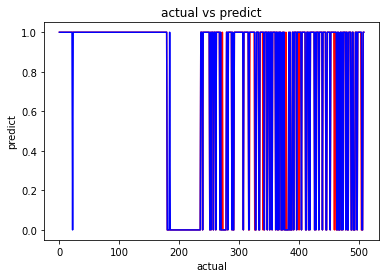

In [62]:
plt.plot(y,color = 'red')
plt.plot(y_predict, color = 'blue')
plt.title('actual vs predict')
plt.xlabel('actual')
plt.ylabel('predict')
plt.show()

###   There is no much difference between actual vs predicted as they are almost overlapping with each other.